# 1.Pandas中的基本数据结构 Series
## 1.1 Series简介
由一列数据和数据对应的索引构成的对象
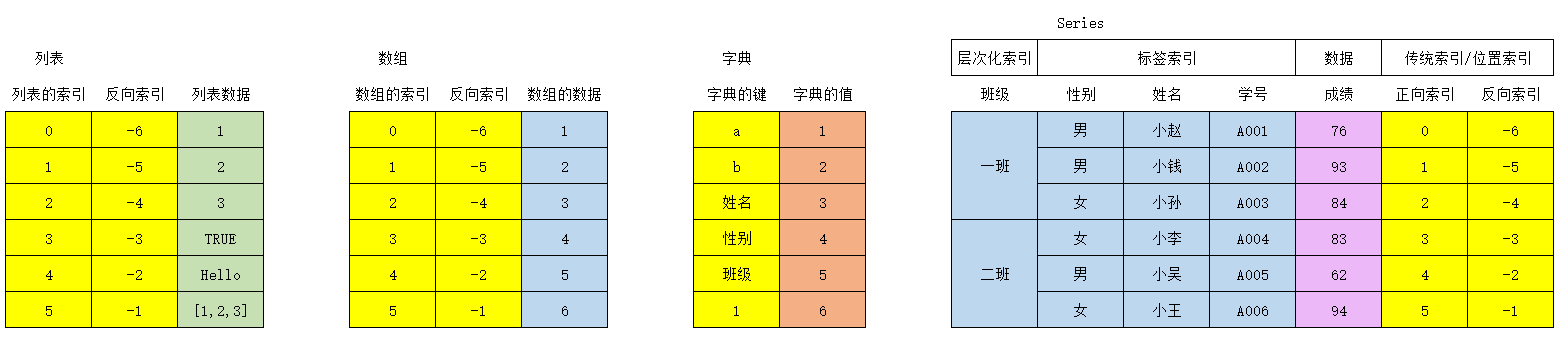

从本质上来说，Series是一个一维的数据结构（Numpy的一维数组），每个Series对象都由两部分构成：index, values

    index : 索引，也是一个数组
    values : 值，一维数组

## 1.2 创建Series

    pd.Series(
        data=None,                # 数据，一般是数组类对象/序列/字典等
        index=None,               # 索引，如果没有指定，就直接显示位置索引
        dtype: 'Dtype | None' = None,   # 数据类型，如果没有指定，就自动根据data的内容决定
        name=None,
        copy: 'bool' = False,
        fastpath: 'bool' = False,
    )

In [1]:
import numpy as np
import pandas as pd

### 创建空的Series

In [2]:
s1 = pd.Series()

In [3]:
s1

Series([], dtype: object)

### 同时指定values和index创建Series

In [4]:
s2 = pd.Series([1,2,3,4,5,6], index = list('abcdef'))

In [5]:
s2

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64

In [6]:
s2.index
# 返回Series的索引，本质上是一个特殊的Numpy数组

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [7]:
s2.index[0]

'a'

In [8]:
s2.values
# Series的值，是一个一维数组

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [9]:
s2.values.shape

(6,)

Series可以视为一个有序的字典，因此，可以直接使用字典创建Series

In [10]:
s3 = pd.Series(
    {
        '姓名':'张三',
        '性别':'男',
        '年龄':20
    }
)
# 将字典转换为Series，字典的键成为Series的index，字典的值成为values

In [11]:
s3

姓名    张三
性别     男
年龄    20
dtype: object

### 创建只有values的Series

In [12]:
s4 = pd.Series(np.random.randint(1,11,10))
# 没有指定index,会自动用位置索引作为index显示出来

In [13]:
s4

0    4
1    8
2    8
3    9
4    5
5    8
6    6
7    9
8    3
9    4
dtype: int32

In [14]:
s4[0]

4

In [15]:
s3[0]

C:\Users\hechang\AppData\Local\Temp\ipykernel_25760\397937684.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s3[0]


'张三'

## 1.3 访问Series及其中的元素
### 通过方法进行访问

    Series.head(n) : 访问Series中开头的n个元素，默认是5
    Series.tail(n) : 访问尾部的n个元素
    Series.take([索引的列表]) : 按指定的索引列表访问对应的元素（花式索引）

In [16]:
s4

0    4
1    8
2    8
3    9
4    5
5    8
6    6
7    9
8    3
9    4
dtype: int32

In [17]:
s4.head()

0    4
1    8
2    8
3    9
4    5
dtype: int32

In [18]:
s4.head(3)

0    4
1    8
2    8
dtype: int32

In [19]:
s4.tail(4)

6    6
7    9
8    3
9    4
dtype: int32

In [20]:
# s4.take(2)
# take一定要将索引放在列表中

In [21]:
s4.take([2])

2    8
dtype: int32

In [22]:
s4.take([2,1,3])

2    8
1    8
3    9
dtype: int32

In [23]:
s4.take(range(1,5,2))

1    8
3    9
dtype: int32

### 通过索引和切片访问（基于位置索引和标签索引）

    索引：
    Series[位置索引]
    Series[标签索引]
    Series.iloc[位置索引] # integer location 
    Series.loc[标签索引]
    loc / iloc 按行访问
    
    Series[[]] # 花式索引：基于位置/标签的数组/列表
    Series[条件表达式]  # 布尔索引
    
    切片：位置的切片/标签的切片
    位置切片 Series[start:stop:step] 和列表/数组类似，返回左闭右开的区间
    标签切片 返回闭区间

In [24]:
s5 = pd.Series(np.arange(8), index = list('abcdefgh'))

In [25]:
s5

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
dtype: int32

In [26]:
# 位置索引
s5[0]

C:\Users\hechang\AppData\Local\Temp\ipykernel_25760\569494456.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s5[0]


0

In [27]:
s5[-1]

C:\Users\hechang\AppData\Local\Temp\ipykernel_25760\2608061338.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s5[-1]


7

In [28]:
# 标签
s5['a']

0

In [29]:
s5['h']

7

In [30]:
s5.loc['a']

0

In [31]:
s5.iloc[0]
# 返回第一行

0

In [32]:
# 花式索引
s5[[1,4,2]]

C:\Users\hechang\AppData\Local\Temp\ipykernel_25760\465782681.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s5[[1,4,2]]


b    1
e    4
c    2
dtype: int32

In [33]:
s5.iloc[[1,4,2]]

b    1
e    4
c    2
dtype: int32

In [34]:
s5[['e','a','h']]

e    4
a    0
h    7
dtype: int32

In [35]:
s5 > 4
# 布尔索引
# 返回的结果是一个布尔型的Series,可以直接作为索引

a    False
b    False
c    False
d    False
e    False
f     True
g     True
h     True
dtype: bool

In [36]:
s5[s5 > 4]

f    5
g    6
h    7
dtype: int32

In [37]:
s5[(s5 > 4) & (s5 <8)]

f    5
g    6
h    7
dtype: int32

In [38]:
# 切片
# 位置切片
s5[1:5]
# 左闭右开

b    1
c    2
d    3
e    4
dtype: int32

In [39]:
# 标签切片
s5['a' : 'e']
# 闭区间

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [40]:
s5.iloc[1:3]

b    1
c    2
dtype: int32

In [41]:
s5.loc['a':'e']

a    0
b    1
c    2
d    3
e    4
dtype: int32